In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-social-network-profile-clustering/03_Clustering_Marketing.csv


### importin libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

In [3]:

data = pd.read_csv("/kaggle/input/students-social-network-profile-clustering/03_Clustering_Marketing.csv")

### Running head command 

In [4]:

data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [5]:
data.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [6]:
data.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

### Let's have a look at the number of male, female and missing values

In [7]:
data['gender'].value_counts(dropna = False) #display NaN values also

gender
F      11057
M       2606
NaN     1337
Name: count, dtype: int64

In [8]:
data['gender'].fillna('not disclosed', inplace = True)


/tmp/ipykernel_30/302797025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].fillna('not disclosed', inplace = True)


In [9]:
data['gender'].isnull().sum()

0

In [10]:
data['gender'].unique()

array(['not disclosed', 'F', 'M'], dtype=object)

### One way to deal with these missing values would be to fill the missing values with the average age of each graduation year

In [11]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [12]:
data.groupby('gradyear')['age'].mean()

gradyear
2006    19.010786
2007    18.400134
2008    17.593006
2009    16.886244
Name: age, dtype: float64

### Now fill the missing values for each graduation year with the mean that we got as above

In [13]:
data['age'] = data.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))

In [14]:
data['age'].isnull().sum()

0

### Data Preprocessing

In [15]:
names = data.columns[4:40]
scaled_feature = data.copy()
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [16]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.410000,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511000,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,19.010786,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657000,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [17]:
features = scaled_feature[names]

In [18]:
features.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,3,0,...,0,0,0,3,0,0,0,0,0,0


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features)

In [20]:
if isinstance(features, np.ndarray):
    features = scaler.transform(features)  # Already a NumPy array
else:
    features = scaler.transform(features.values)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
scaled_feature[names] = features
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,not disclosed,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
1,2007,F,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926
2,2007,F,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582
3,2006,F,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
4,2008,F,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


### Convert object variable to numeric

In [22]:
def gender_to_numeric(x):
    if x=="M":
        return 1
    if x=="F":
        return 2
    if x== 'not disclosed':
        return 3

In [23]:
scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
scaled_feature['gender'].head()

0    3
1    2
2    2
3    2
4    2
Name: gender, dtype: int64

### Checking the transformed values

In [24]:
scaled_feature.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,3,18.400134,0,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
1,2007,2,17.410000,49,-0.338478,-0.36379,0.845295,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,-0.174926
2,2007,2,17.511000,41,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,1.051334,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,2.159369,2.689582
3,2006,2,19.010786,36,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,-0.246048,...,-0.041671,-0.368365,-0.490423,-0.313906,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926
4,2008,2,16.657000,1,-0.338478,-0.36379,-0.241202,-0.21655,-0.223779,1.576532,...,-0.041671,-0.368365,-0.490423,5.953073,-0.201546,-0.183322,-0.304746,-0.259382,-0.218093,-0.174926


### Building the K-means model

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [26]:
model = kmeans.fit(scaled_feature)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Creating a function with KMeans to plot "The Elbow Curve"

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

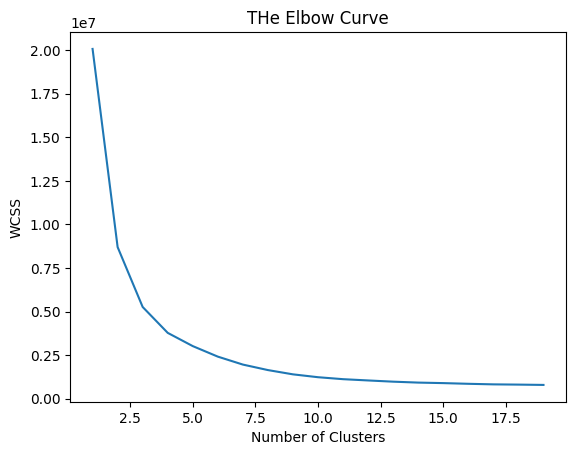

In [27]:


wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [29]:
kmeans.labels_

array([2, 3, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
len(kmeans.labels_)

15000

In [31]:
data['cluster'] = kmeans.labels_

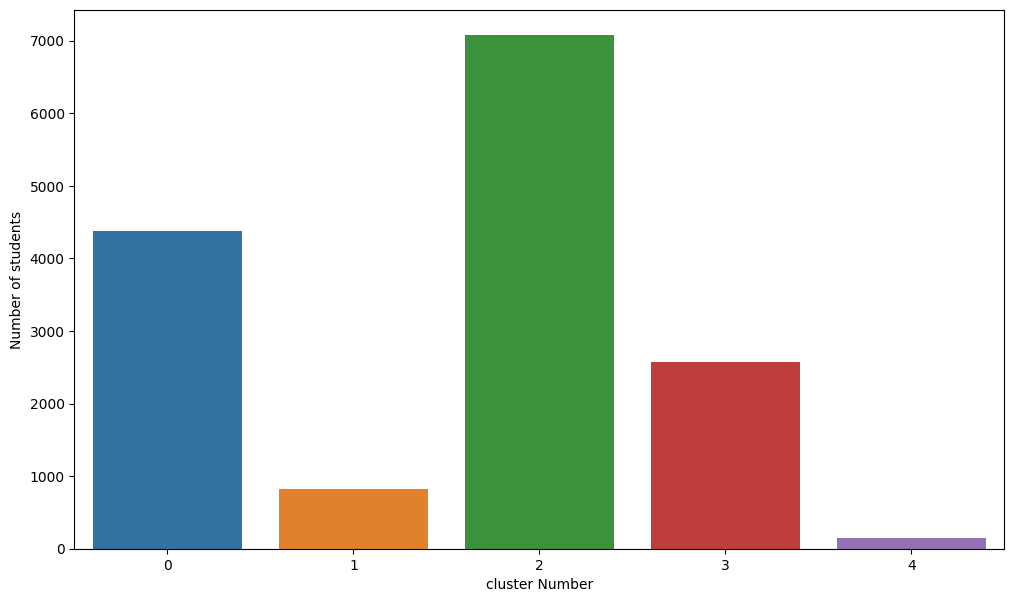

In [32]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

In [33]:
size_array = list(data.groupby(['cluster']).count()['age'].values)
size_array

[4378, 824, 7072, 2579, 147]

### Calculate the mean age for each cluster

In [34]:

mean_age = data.groupby('cluster')['age'].mean()


for cluster, age in mean_age.items():
    print(f"Cluster {cluster}: {age:.2f} years")


Cluster 0: 18.01 years
Cluster 1: 17.81 years
Cluster 2: 18.06 years
Cluster 3: 17.75 years
Cluster 4: 17.68 years


In [35]:
data['gender'] = data['gender'].map({'F': 0, 'M': 1, 'not disclosed':3})


In [36]:
data['gender'].value_counts()


gender
0    11057
1     2606
3     1337
Name: count, dtype: int64

## Calculate the percentage of females in each cluster

In [37]:

percentage_female = data[data['gender'] == 0].groupby('cluster').size() / data.groupby('cluster').size() * 100


for cluster, percentage in percentage_female.items():
    print(f"Cluster {cluster}: {percentage:.2f}% females")


Cluster 0: 75.26% females
Cluster 1: 79.61% females
Cluster 2: 70.35% females
Cluster 3: 77.67% females
Cluster 4: 87.07% females


### Calculate the average number of friends in each cluster

In [38]:

mean_friends = data.groupby('cluster')['NumberOffriends'].mean()

for cluster, avg_friends in mean_friends.items():
    print(f"Cluster {cluster}: Average number of friends = {avg_friends:.2f}")


Cluster 0: Average number of friends = 29.83
Cluster 1: Average number of friends = 110.61
Cluster 2: Average number of friends = 5.05
Cluster 3: Average number of friends = 61.79
Cluster 4: Average number of friends = 208.65


### Observation
_ Clusters 1, 2, and 3 have a higher percentage of females compared to the overall population. 
Products related to fashion, beauty, socializing, or lifestyle may resonate more with these clusters.

_ Clusters 0 and 4 have a higher percentage of males
Products related to sports, technology, gaming, or adventure may appeal more to these clusters.

_ Clusters 2 and 3 show a higher interest in shopping

_ Collaborate with sports brands or organize sports-related events and activities to appeal to clusters showing a strong interest in sports (e.g., Clusters 3 and 4).